A 30-days moving average is an essential part of moving averages and technically defines the movement of stock prices over 30 days. It is a short-term technical indicator which is the average of the closing price of a particular stock over 30 days.



In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
btc=pd.read_csv('BTC-USD.csv',parse_dates=True)

In [126]:

plt.rcParams["figure.figsize"] = (30,20)
btc.head()
from datetime import datetime
import time
def pos(d):
    d=datetime.strptime(d,"%Y-%m-%d")
    return time.mktime(d.timetuple())

C:\Users\WIN10~1\AppData\Local\Temp/ipykernel_844/459304457.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(pd.date_range(start=btc.Date.min(),end=btc.Date.max(),periods=10),rotation=30)


[Text(-500.0, 0, '2014-09-17 00:00:00'),
 Text(0.0, 0, '2015-07-19 02:40:00'),
 Text(500.0, 0, '2016-05-19 05:20:00'),
 Text(1000.0, 0, '2017-03-20 08:00:00'),
 Text(1500.0, 0, '2018-01-19 10:40:00'),
 Text(2000.0, 0, '2018-11-20 13:20:00'),
 Text(2500.0, 0, '2019-09-21 16:00:00'),
 Text(3000.0, 0, '2020-07-22 18:40:00')]

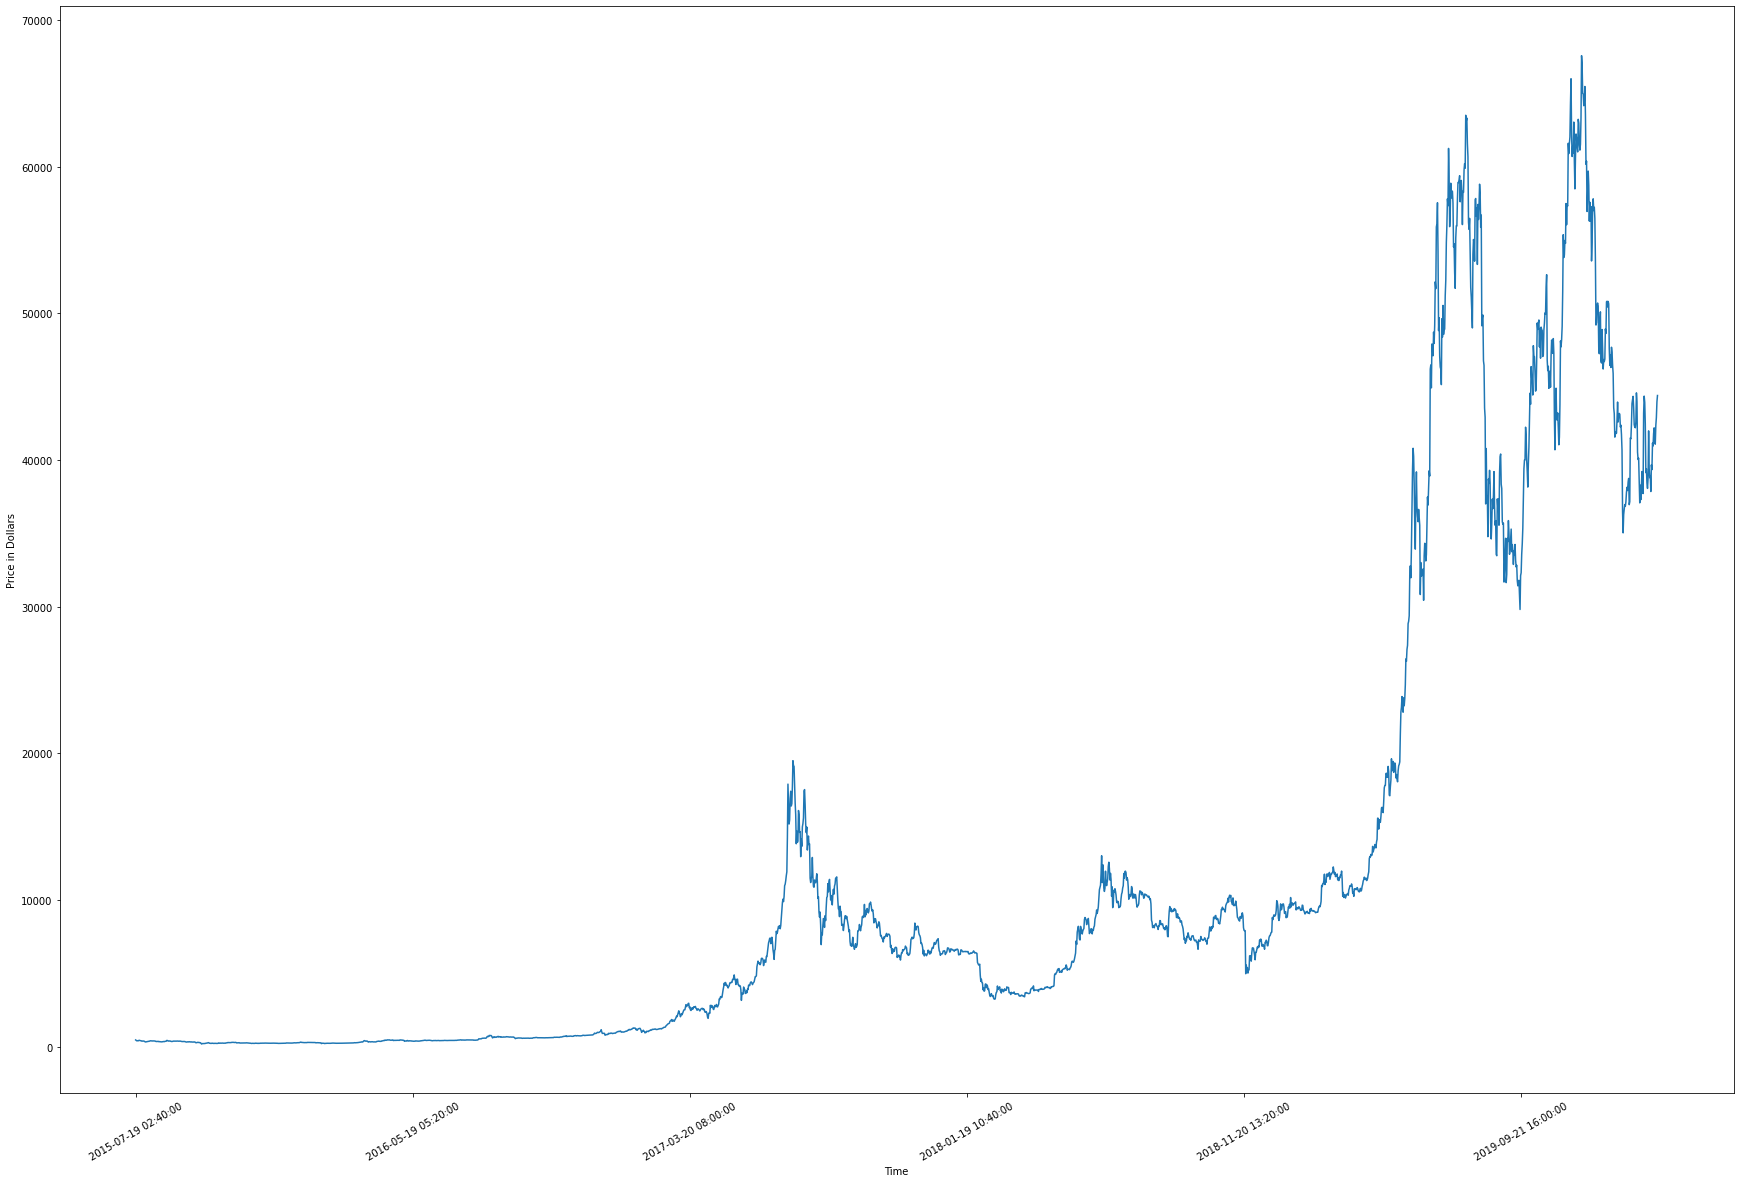

In [127]:
fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.plot(btc.Close)
ax1.set_xlabel("Time")
ax1.set_ylabel("Price in Dollars")
ax1.set_xticklabels(pd.date_range(start=btc.Date.min(),end=btc.Date.max(),periods=10),rotation=30)


C:\Users\WIN10~1\AppData\Local\Temp/ipykernel_844/3131672014.py:1: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(pd.date_range(start=btc.Date.min(),end=btc.Date.max(),periods=10),rotation=30, fontsize='small')


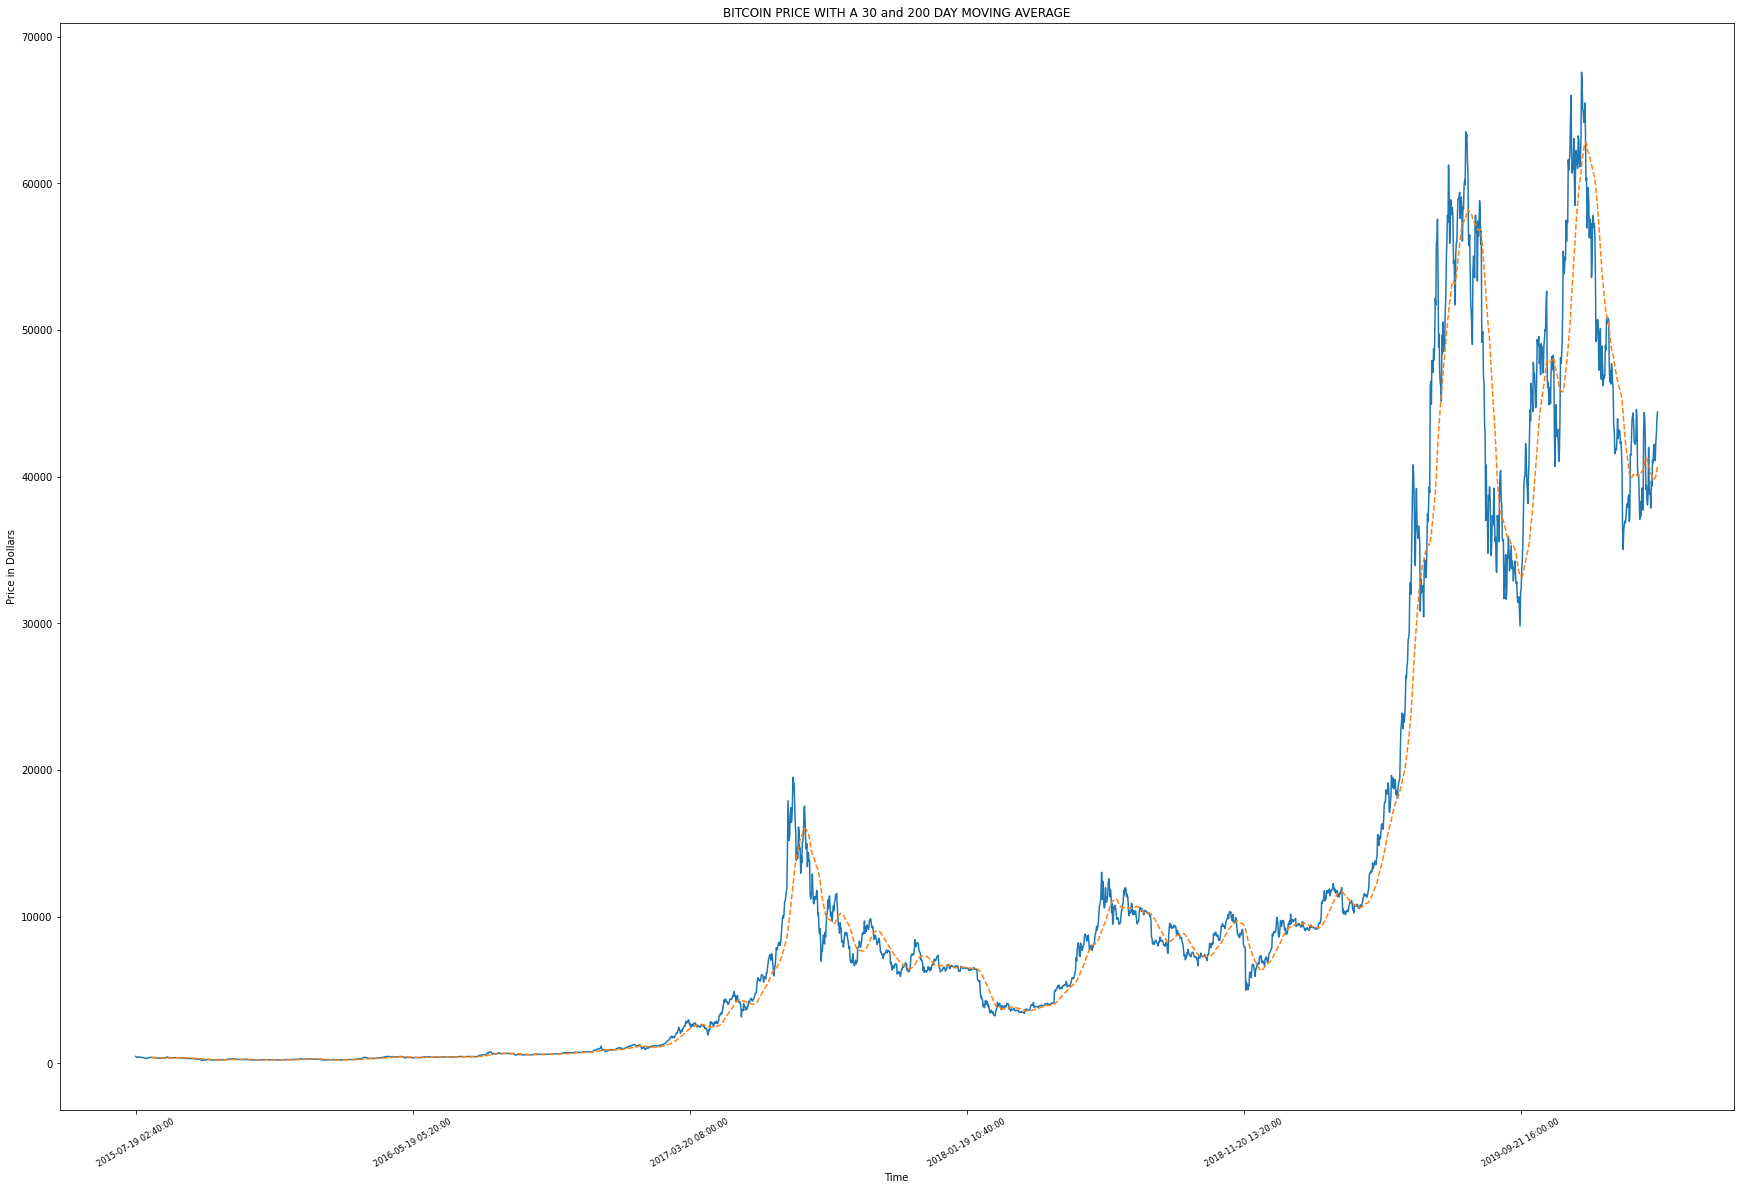

In [128]:
ax1.set_xticklabels(pd.date_range(start=btc.Date.min(),end=btc.Date.max(),periods=10),rotation=30, fontsize='small')
ax1.plot(btc.Close.rolling(30).mean(),'--')

ax1.set_title("BITCOIN PRICE WITH A 30 and 200 DAY MOVING AVERAGE")
fig

In [129]:
btc.Close.rolling(30).mean()


0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
            ...     
2742    39917.326432
2743    40048.240755
2744    40242.163281
2745    40431.326823
2746    40667.973307
Name: Close, Length: 2747, dtype: float64

In [130]:
btc['ThirtyDayMA']=btc.Close.rolling(30).mean()

btc['TwoHundredDayMA']=btc.Close.rolling(200).mean()

In [131]:
btc_updated=btc[200:]
btc_updated.reset_index(drop=True,inplace=True)
btc_updated.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,ThirtyDayMA,TwoHundredDayMA
2542,2022-03-21,41246.132813,41454.410156,40668.042969,41077.996094,41077.996094,24615543271,39917.326432,48429.467676
2543,2022-03-22,41074.105469,43124.707031,40948.281250,42358.808594,42358.808594,32004652376,40048.240755,48391.134844
2544,2022-03-23,42364.378906,42893.507813,41877.507813,42892.957031,42892.957031,25242943069,40242.163281,48355.876504
2545,2022-03-24,42886.652344,44131.855469,42726.164063,43960.933594,43960.933594,31042992291,40431.326823,48316.914121
2546,2022-03-25,43958.675781,44982.519531,43711.871094,44395.964844,44395.964844,30379415552,40667.973307,48275.726270


C:\Users\WIN10~1\AppData\Local\Temp/ipykernel_844/3886482474.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_updated['position']=np.where(btc_updated['ThirtyDayMA']>btc_updated['TwoHundredDayMA'],1,-1)


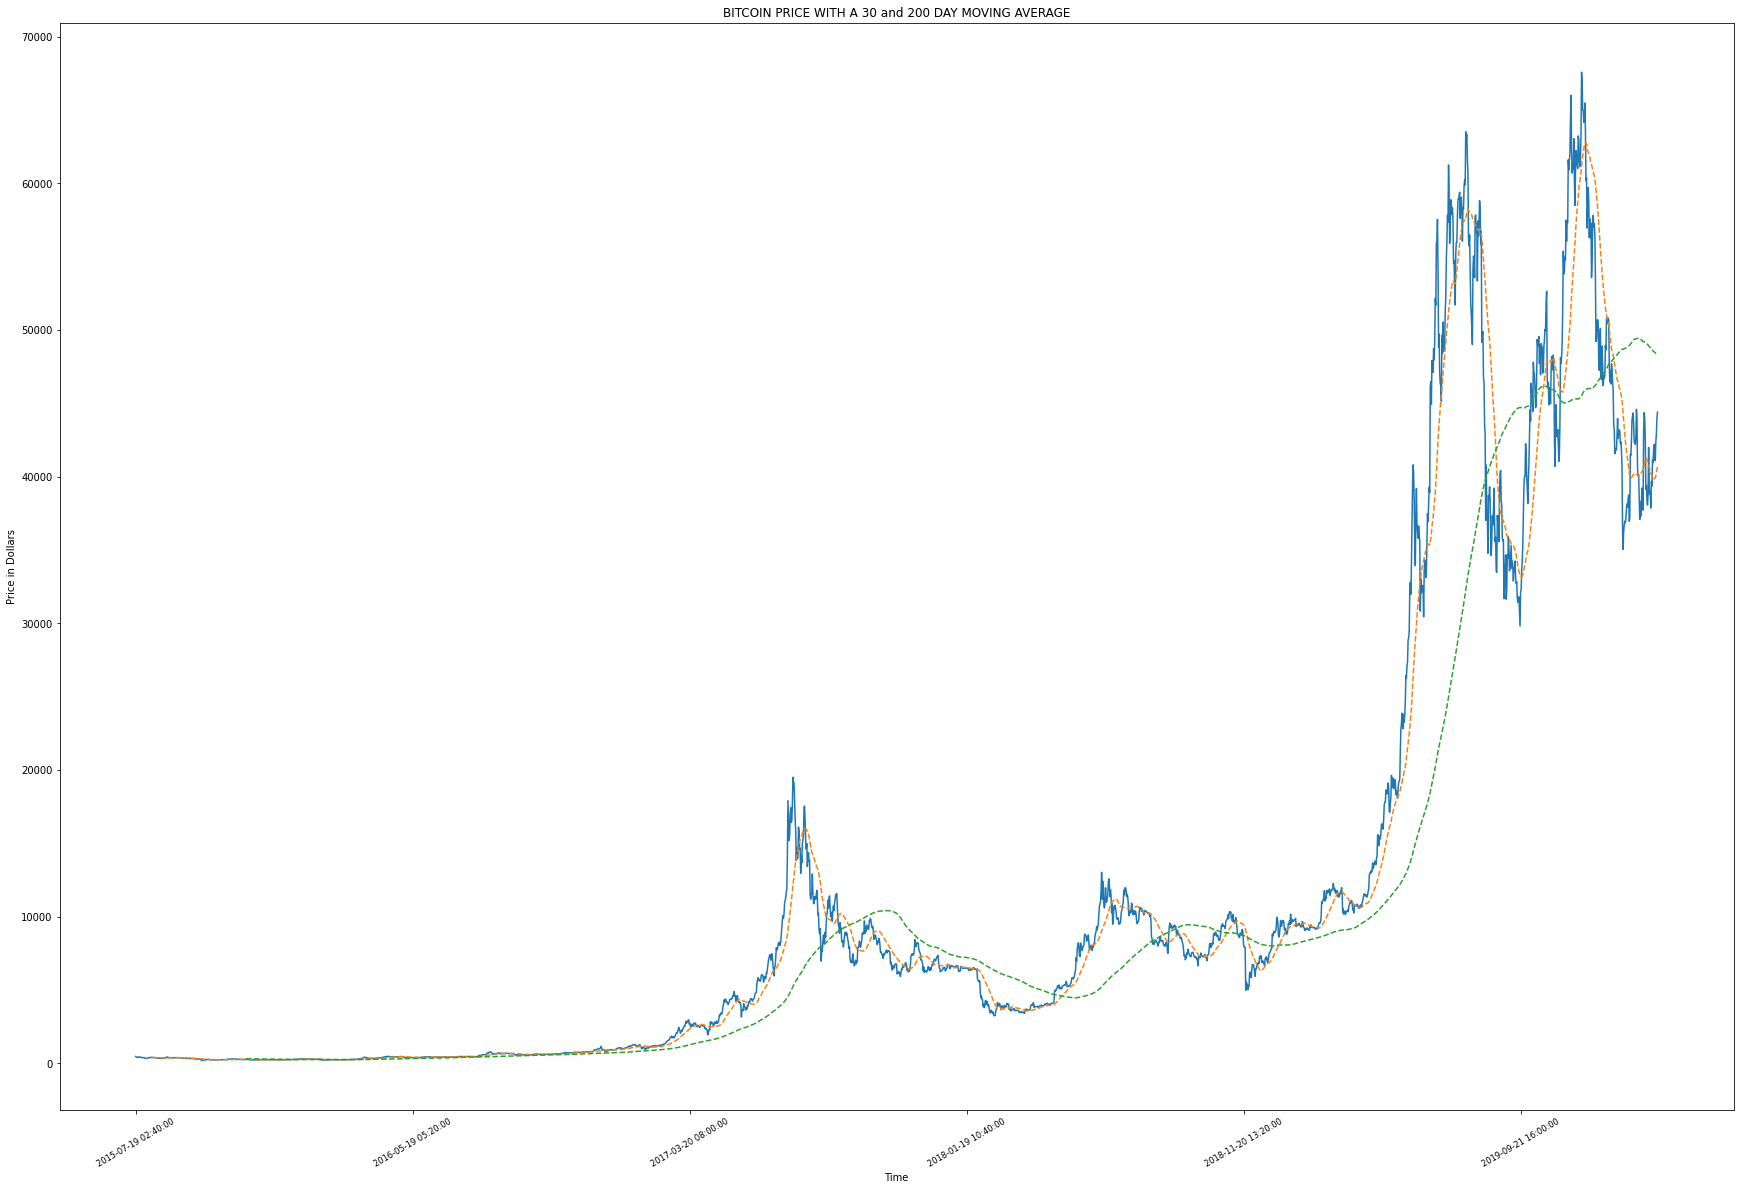

In [132]:

ax1.plot(btc.Close.rolling(200).mean(),'--')



btc_updated['position']=np.where(btc_updated['ThirtyDayMA']>btc_updated['TwoHundredDayMA'],1,-1)
buy_index=[]
sell_index=[]
fig 


In [133]:
btc_updated
flag=btc_updated.loc[0,'position']

for row in btc_updated.index:
    if btc_updated.loc[row,'position']!=flag: 
        if flag==-1:
            buy_index.append(row)
            flag=1
        else:
            sell_index.append(row)
            flag=-1

In [134]:
btc_updated.head()

,Date,Open,High,Low,Close,Adj Close,Volume,ThirtyDayMA,TwoHundredDayMA,position
0,2015-04-05,253.761002,260.674988,251.942001,260.597992,260.597992,19649200,265.654567,309.859490,-1
1,2015-04-06,260.721008,261.798004,254.574997,255.492004,255.492004,20034200,264.962268,309.014750,-1
2,2015-04-07,255.274002,255.804993,252.205002,253.179993,253.179993,18467400,264.256468,308.306670,-1
3,2015-04-08,253.063995,253.847000,244.214996,245.022003,245.022003,30086400,262.770301,307.487260,-1
4,2015-04-09,244.751007,246.117996,239.399994,243.675995,243.675995,21643500,261.167501,306.711535,-1


In [135]:
print("buy_index=" ,buy_index)

buy_index= [95, 200, 1472, 1770, 1864, 2341]


In [136]:
print("sell index=",sell_index)

sell index= [148, 1088, 1655, 1806, 2255, 2468]


In [137]:
buy_pts=btc_updated.loc[buy_index,['Date','Close']]

sell_pts=btc_updated.loc[sell_index,['Date','Close']]
buy_pts.head()

,Date,Close
95,2015-07-09,269.227997
200,2015-10-22,274.023010
1472,2019-04-16,5235.559570
1770,2020-02-08,9865.119141
1864,2020-05-12,8804.477539


In [138]:
btc.Date=btc.Date.apply(pos)
sell_pts.Date=sell_pts.Date.apply(pos)

In [139]:
buy_pts.Date=buy_pts.Date.apply(pos)

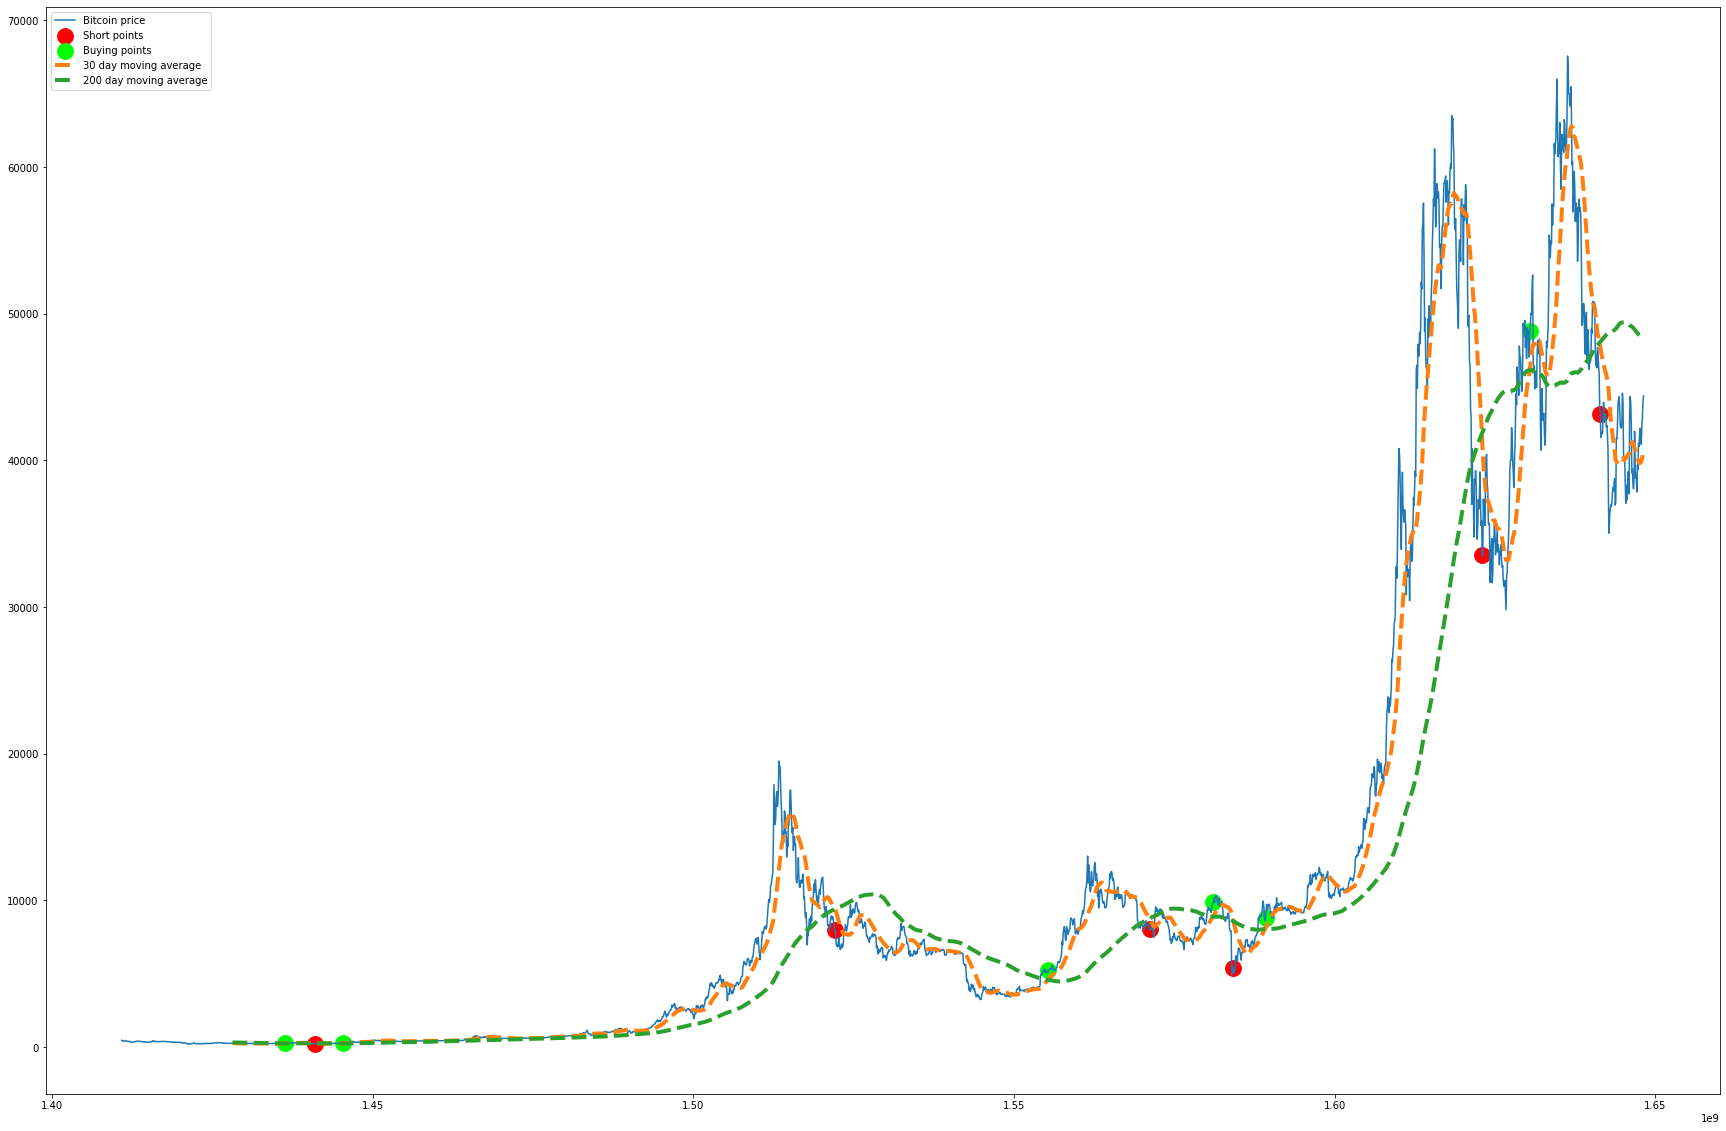

In [147]:
plt.plot(btc.Date,btc.Close,label="Bitcoin price")
plt.scatter(sell_pts.Date,sell_pts.Close,color = '#FF0000',label="Short points",s=250)
plt.scatter(buy_pts.Date,buy_pts.Close,color = '#00FF00',label="Buying points",s=250)
plt.plot(btc_updated.Date.apply(pos),btc_updated.ThirtyDayMA,'--',label="30 day moving average",linewidth=4)
plt.plot(btc_updated.Date.apply(pos),btc_updated.TwoHundredDayMA,'--',label="200 day moving average",linewidth=4)

plt.xlabel="Posix Time"
plt.label="Prices"

plt.legend(loc="best")
plt.show()

In [148]:
s=0

for i in range(len(buy_index)):
    s+=(btc_updated.loc[sell_index[i],'Close']-btc_updated.loc[buy_index[i],'Close'])/btc_updated.loc[buy_index[i],'Close']

In [149]:
print("Total return on investment by using the 30 day moving average strategy is "+str(s*100)+" %")

Total return on investment by using the 30 day moving average strategy is 3066.2078853346266 %
